# Weight Visualizations 
Author: Tolya Evdokimov

Here, we will apply the best convolutional filters to one sample image to see 

In [1]:
import tensorflow as tf
import sys
import matplotlib.pyplot as plt

sys.path.append('../src/')

from models.unet import Unet
from data.utils import preprocess_dataset

from keras.utils import plot_model

Load in the model and the best weights, get ht etest dataset

In [2]:
model = Unet(7).build()
model.load_weights('../experiments/unet/weights/unet_49-0.14.h5')

plot_model(model, to_file='model.png', show_shapes=True)

raw_test = tf.data.TFRecordDataset("../dataset/test.tfrecords")
test = preprocess_dataset(raw_test, sum(1 for _ in raw_test))
test = test.unbatch().batch(20)

Here, we will isolate the layers based on the names and will send the chosen image through the chosen part of the model.

In [18]:
def get_filters(inp_name, out_name):
    """
    Extracts conv layers from the model and sends the data through
    the extracted layers to apply filters to the images.
    """

    # Extract conv layers and wrap them ib tf.keras.Model
    for layer in model.layers:
        if layer.name == inp_name:
            inp = layer.input
            
        if layer.name == out_name:
            conv_sim = tf.keras.Model(inputs=inp, outputs=layer.output)
            break

    
    for ex in test.take(1):
        img = ex[0]['input_1']

    # Send the image through the conv layers to apply fitlers
    feature_maps = conv_sim.predict(img)

    # Define figure parameters
    cols = 8
    rows = 4
    ix = 1

    # Plot the first 32 filters in greyscale
    plt.figure(figsize=(10,10),dpi=300)
    for _ in range(32):
        ax = plt.subplot(rows, cols, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')

        ix += 1
    plt.show()

1/1 [==============================] - 0s 105ms/step


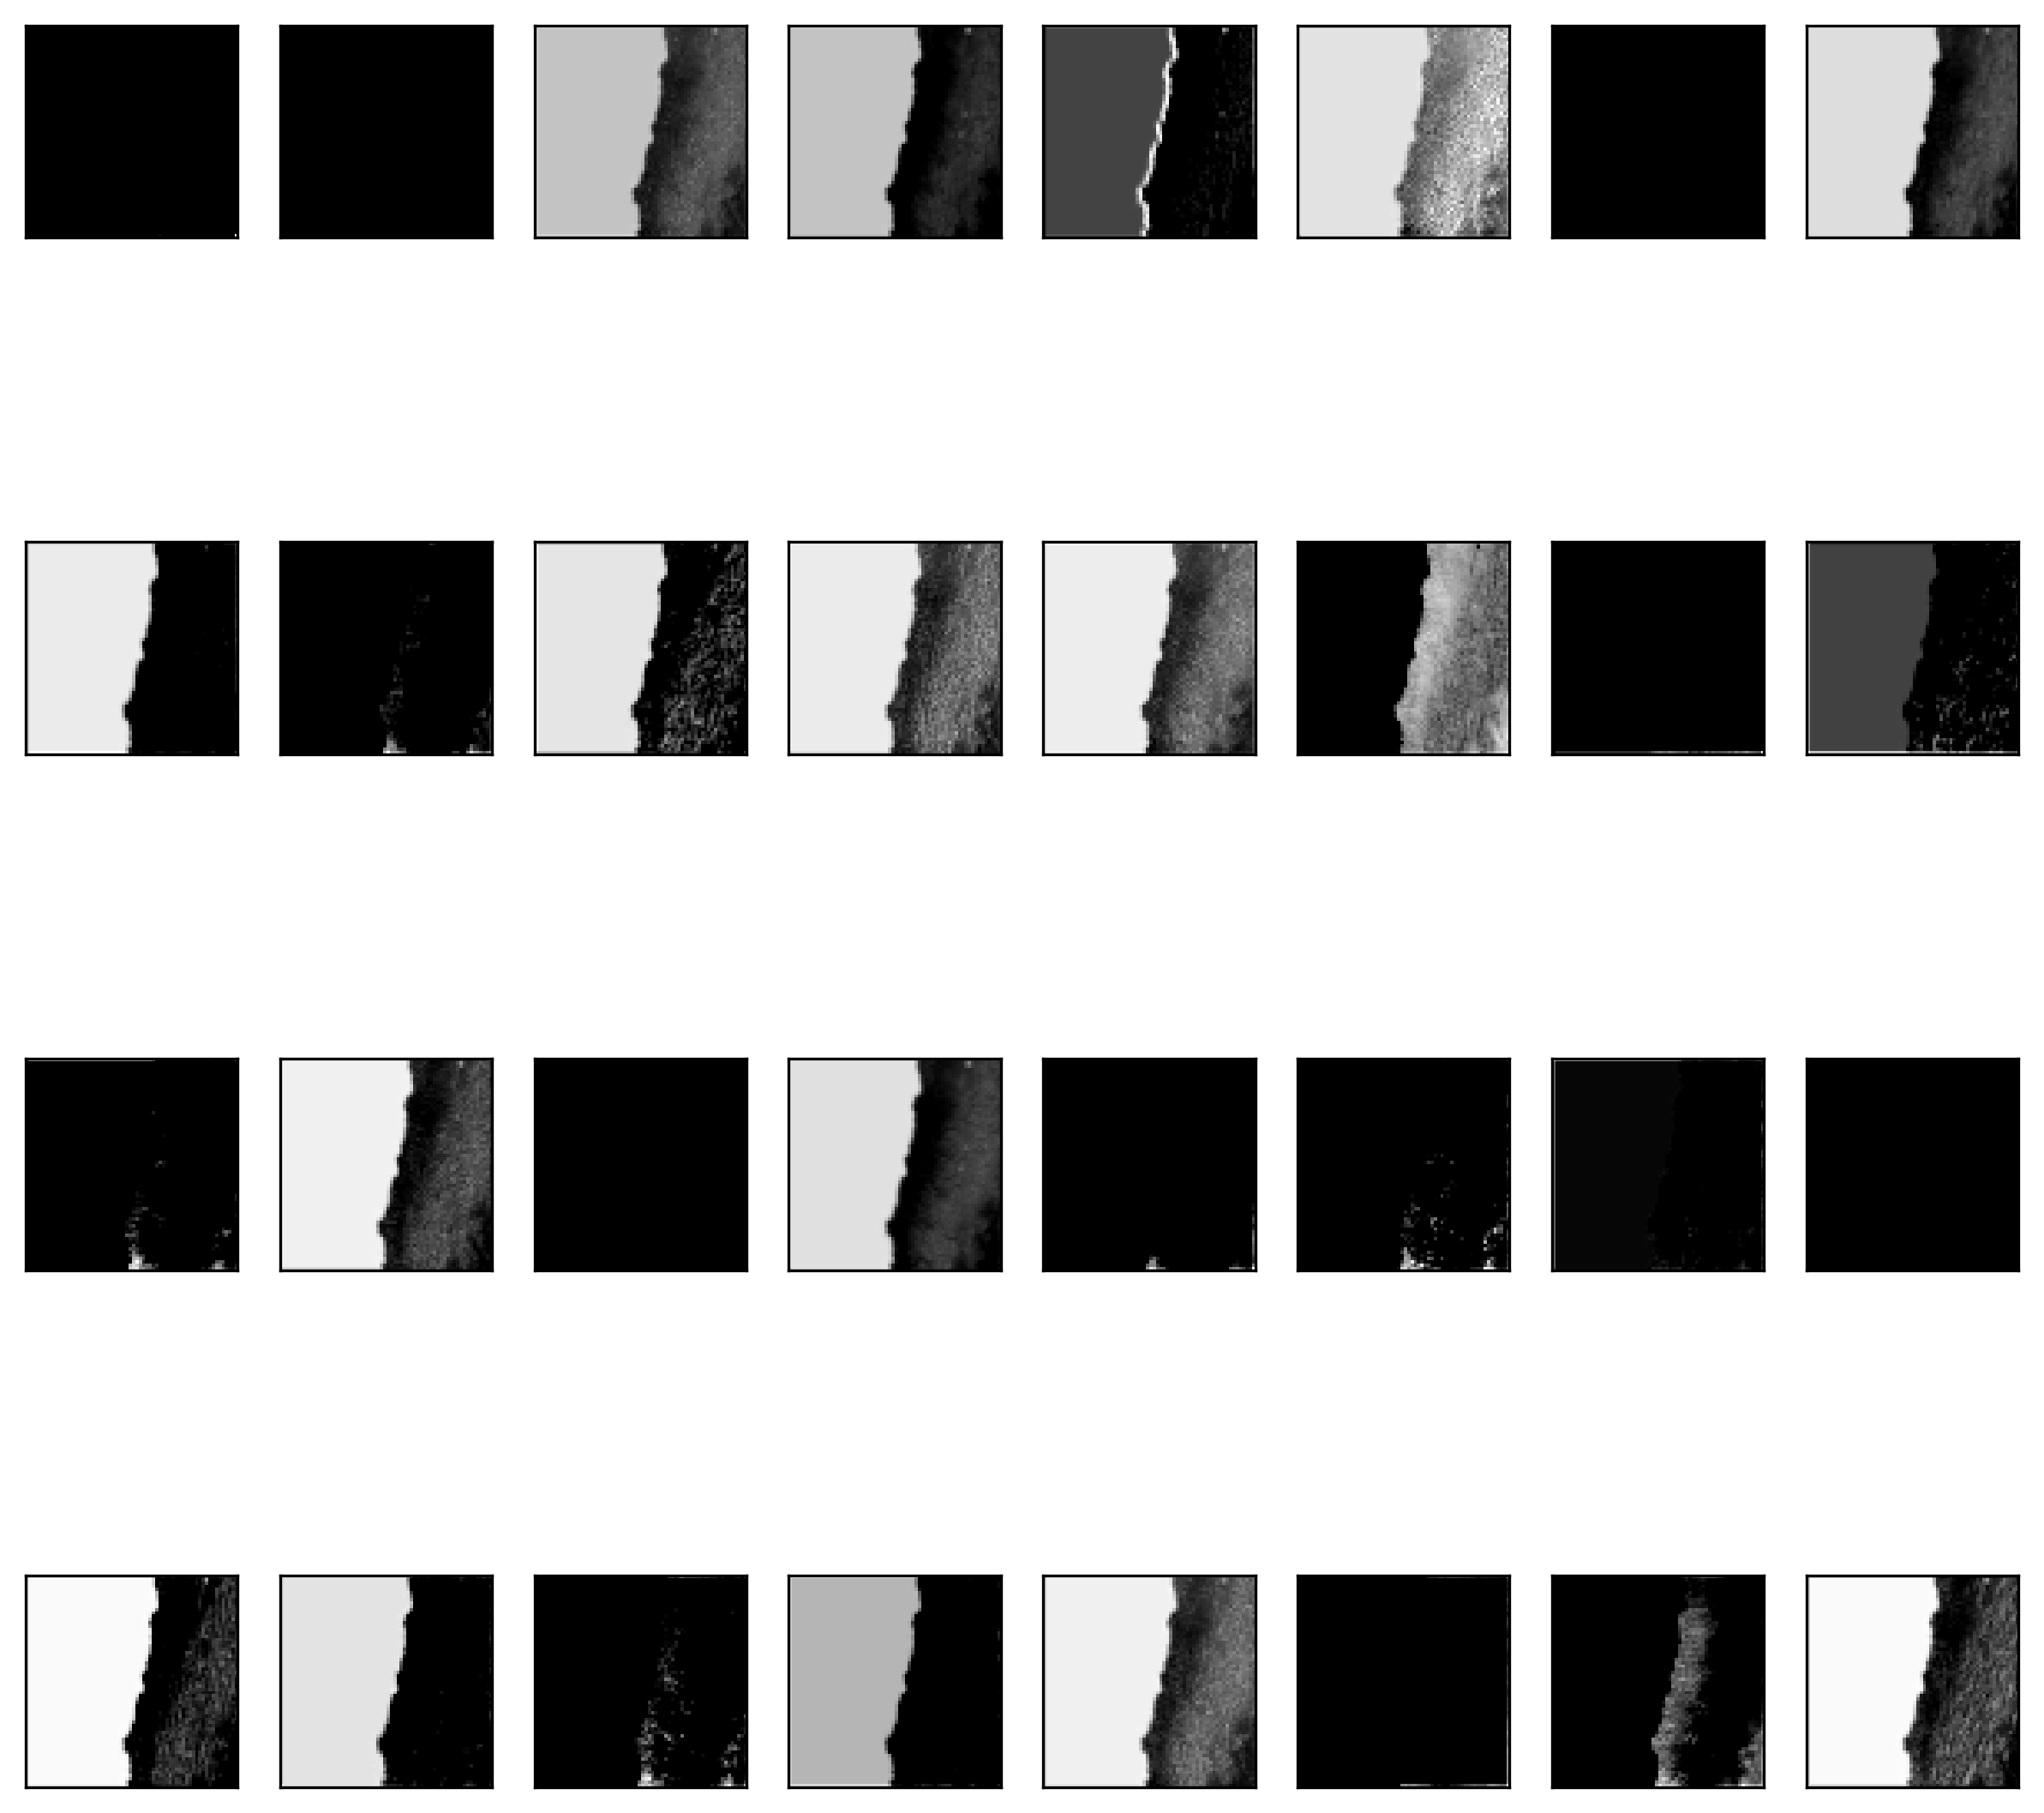

1/1 [==============================] - 0s 180ms/step


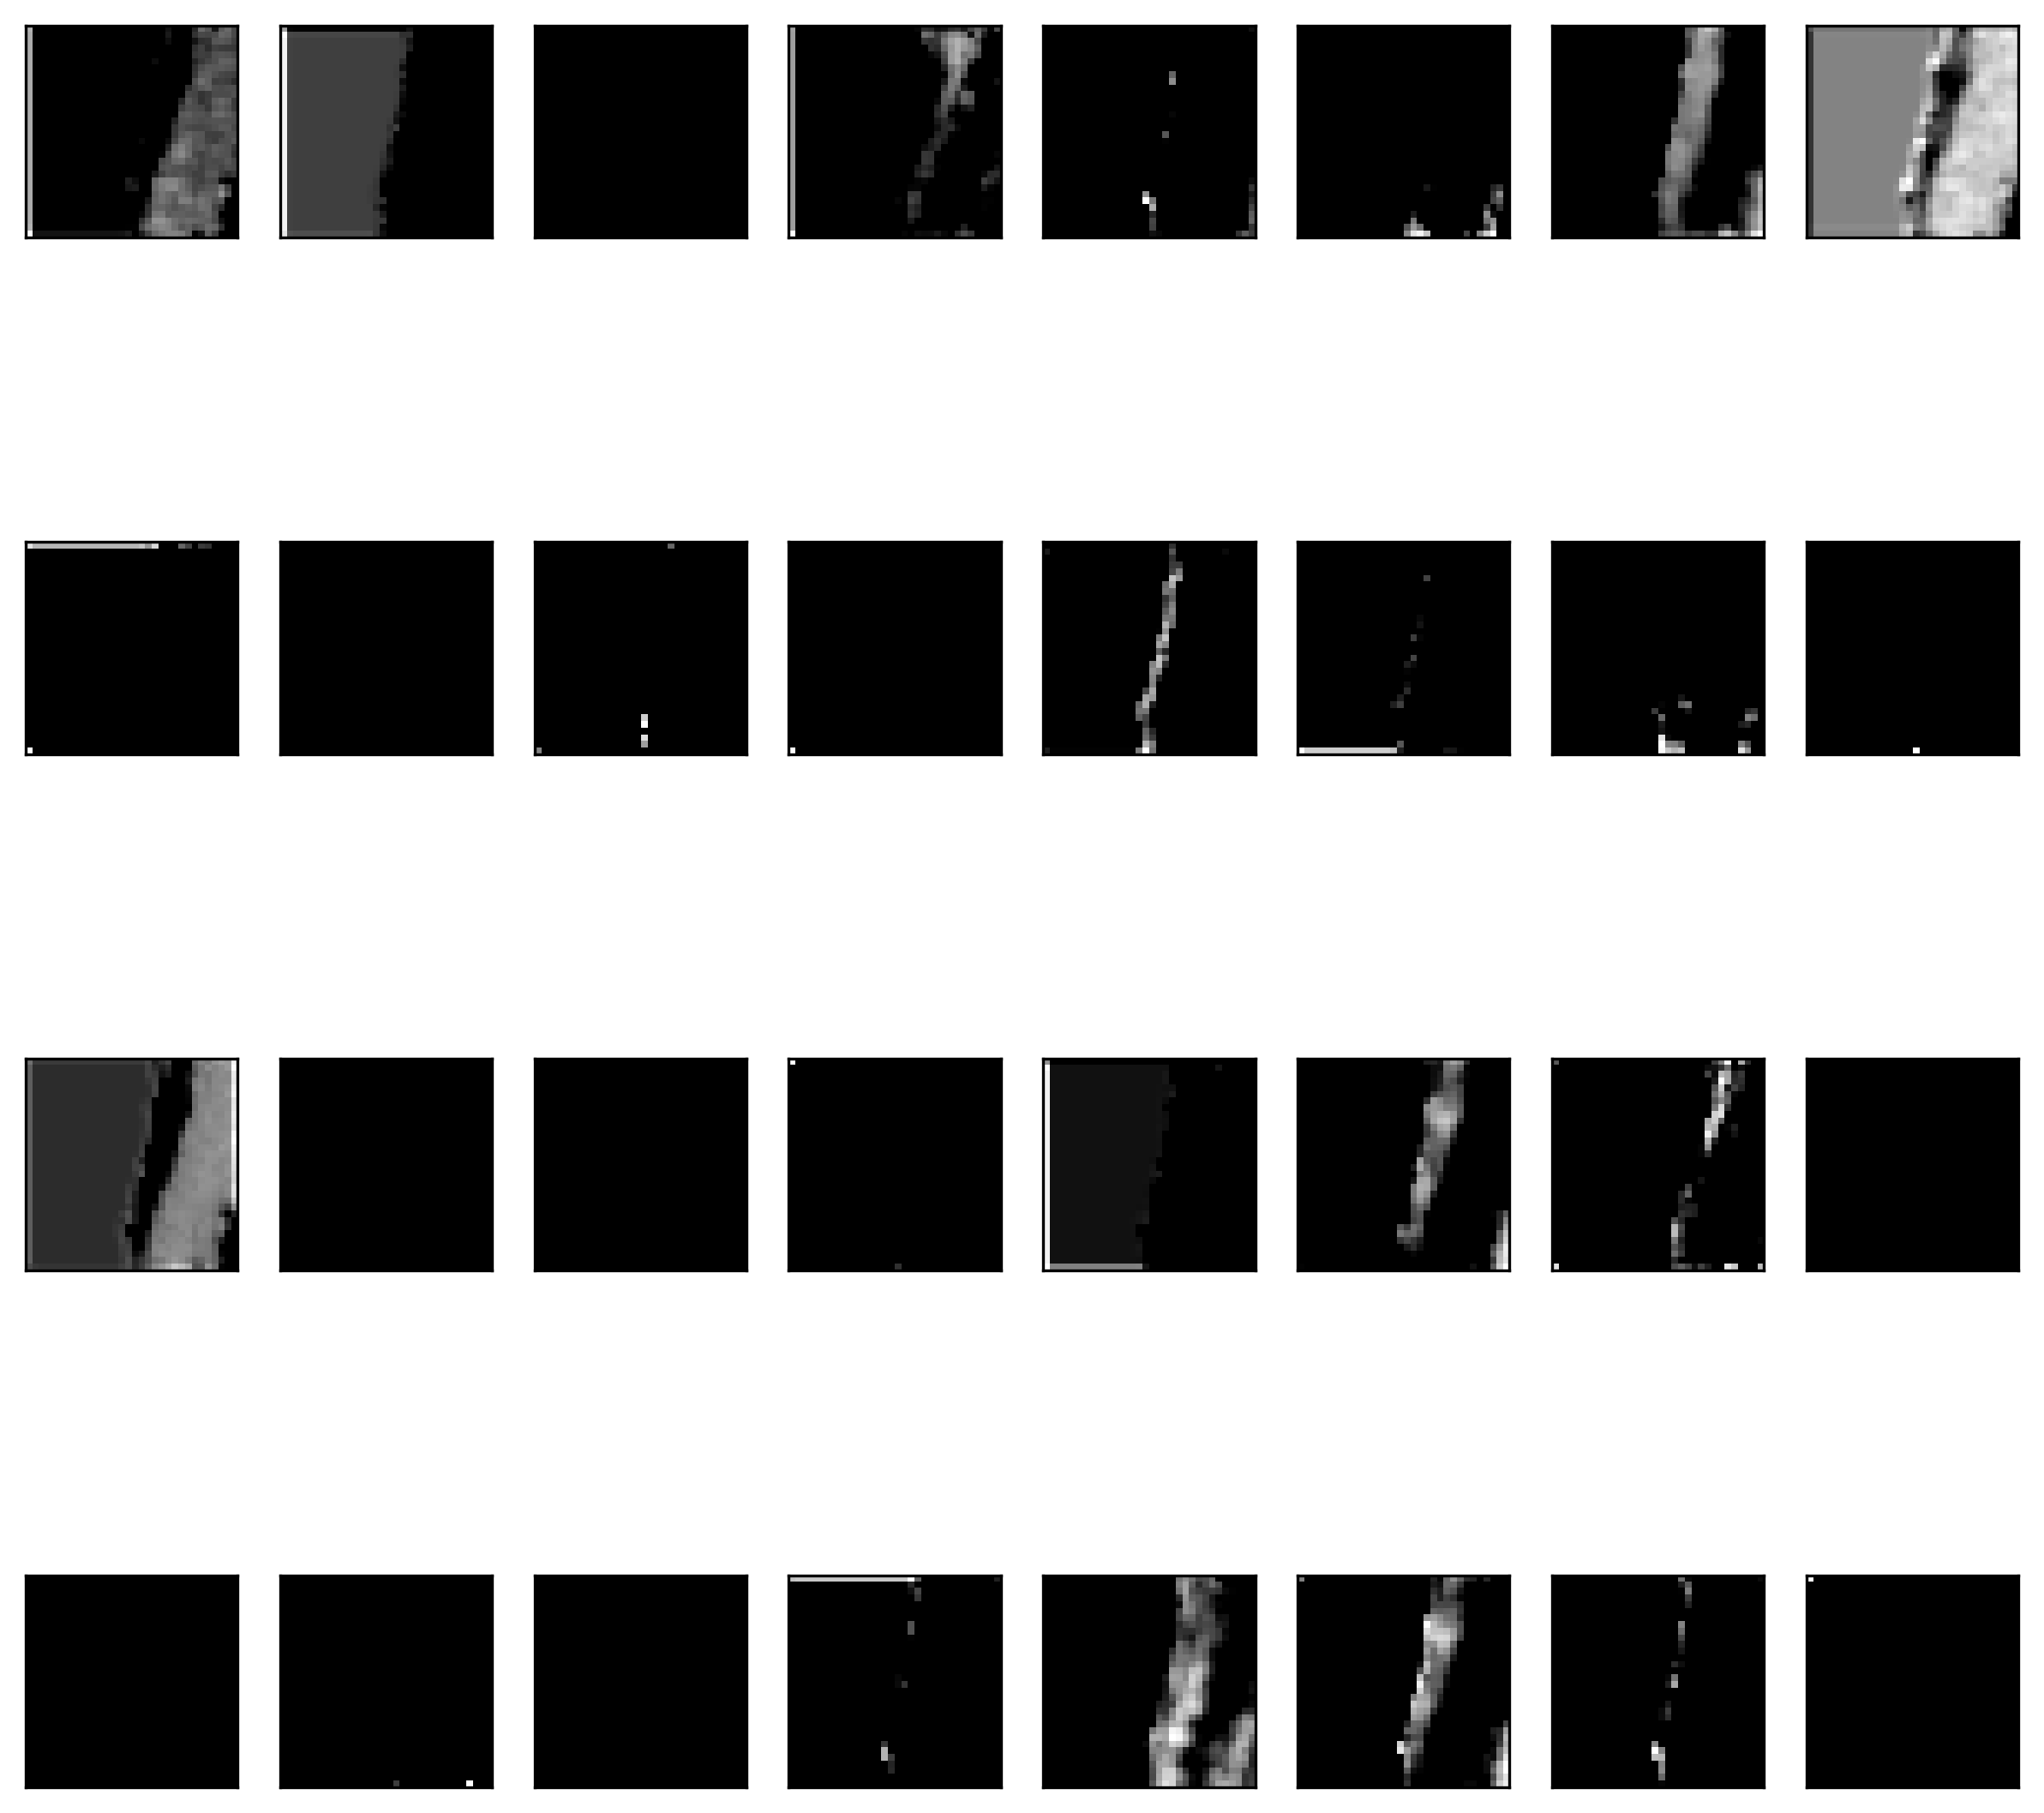

1/1 [==============================] - 0s 244ms/step


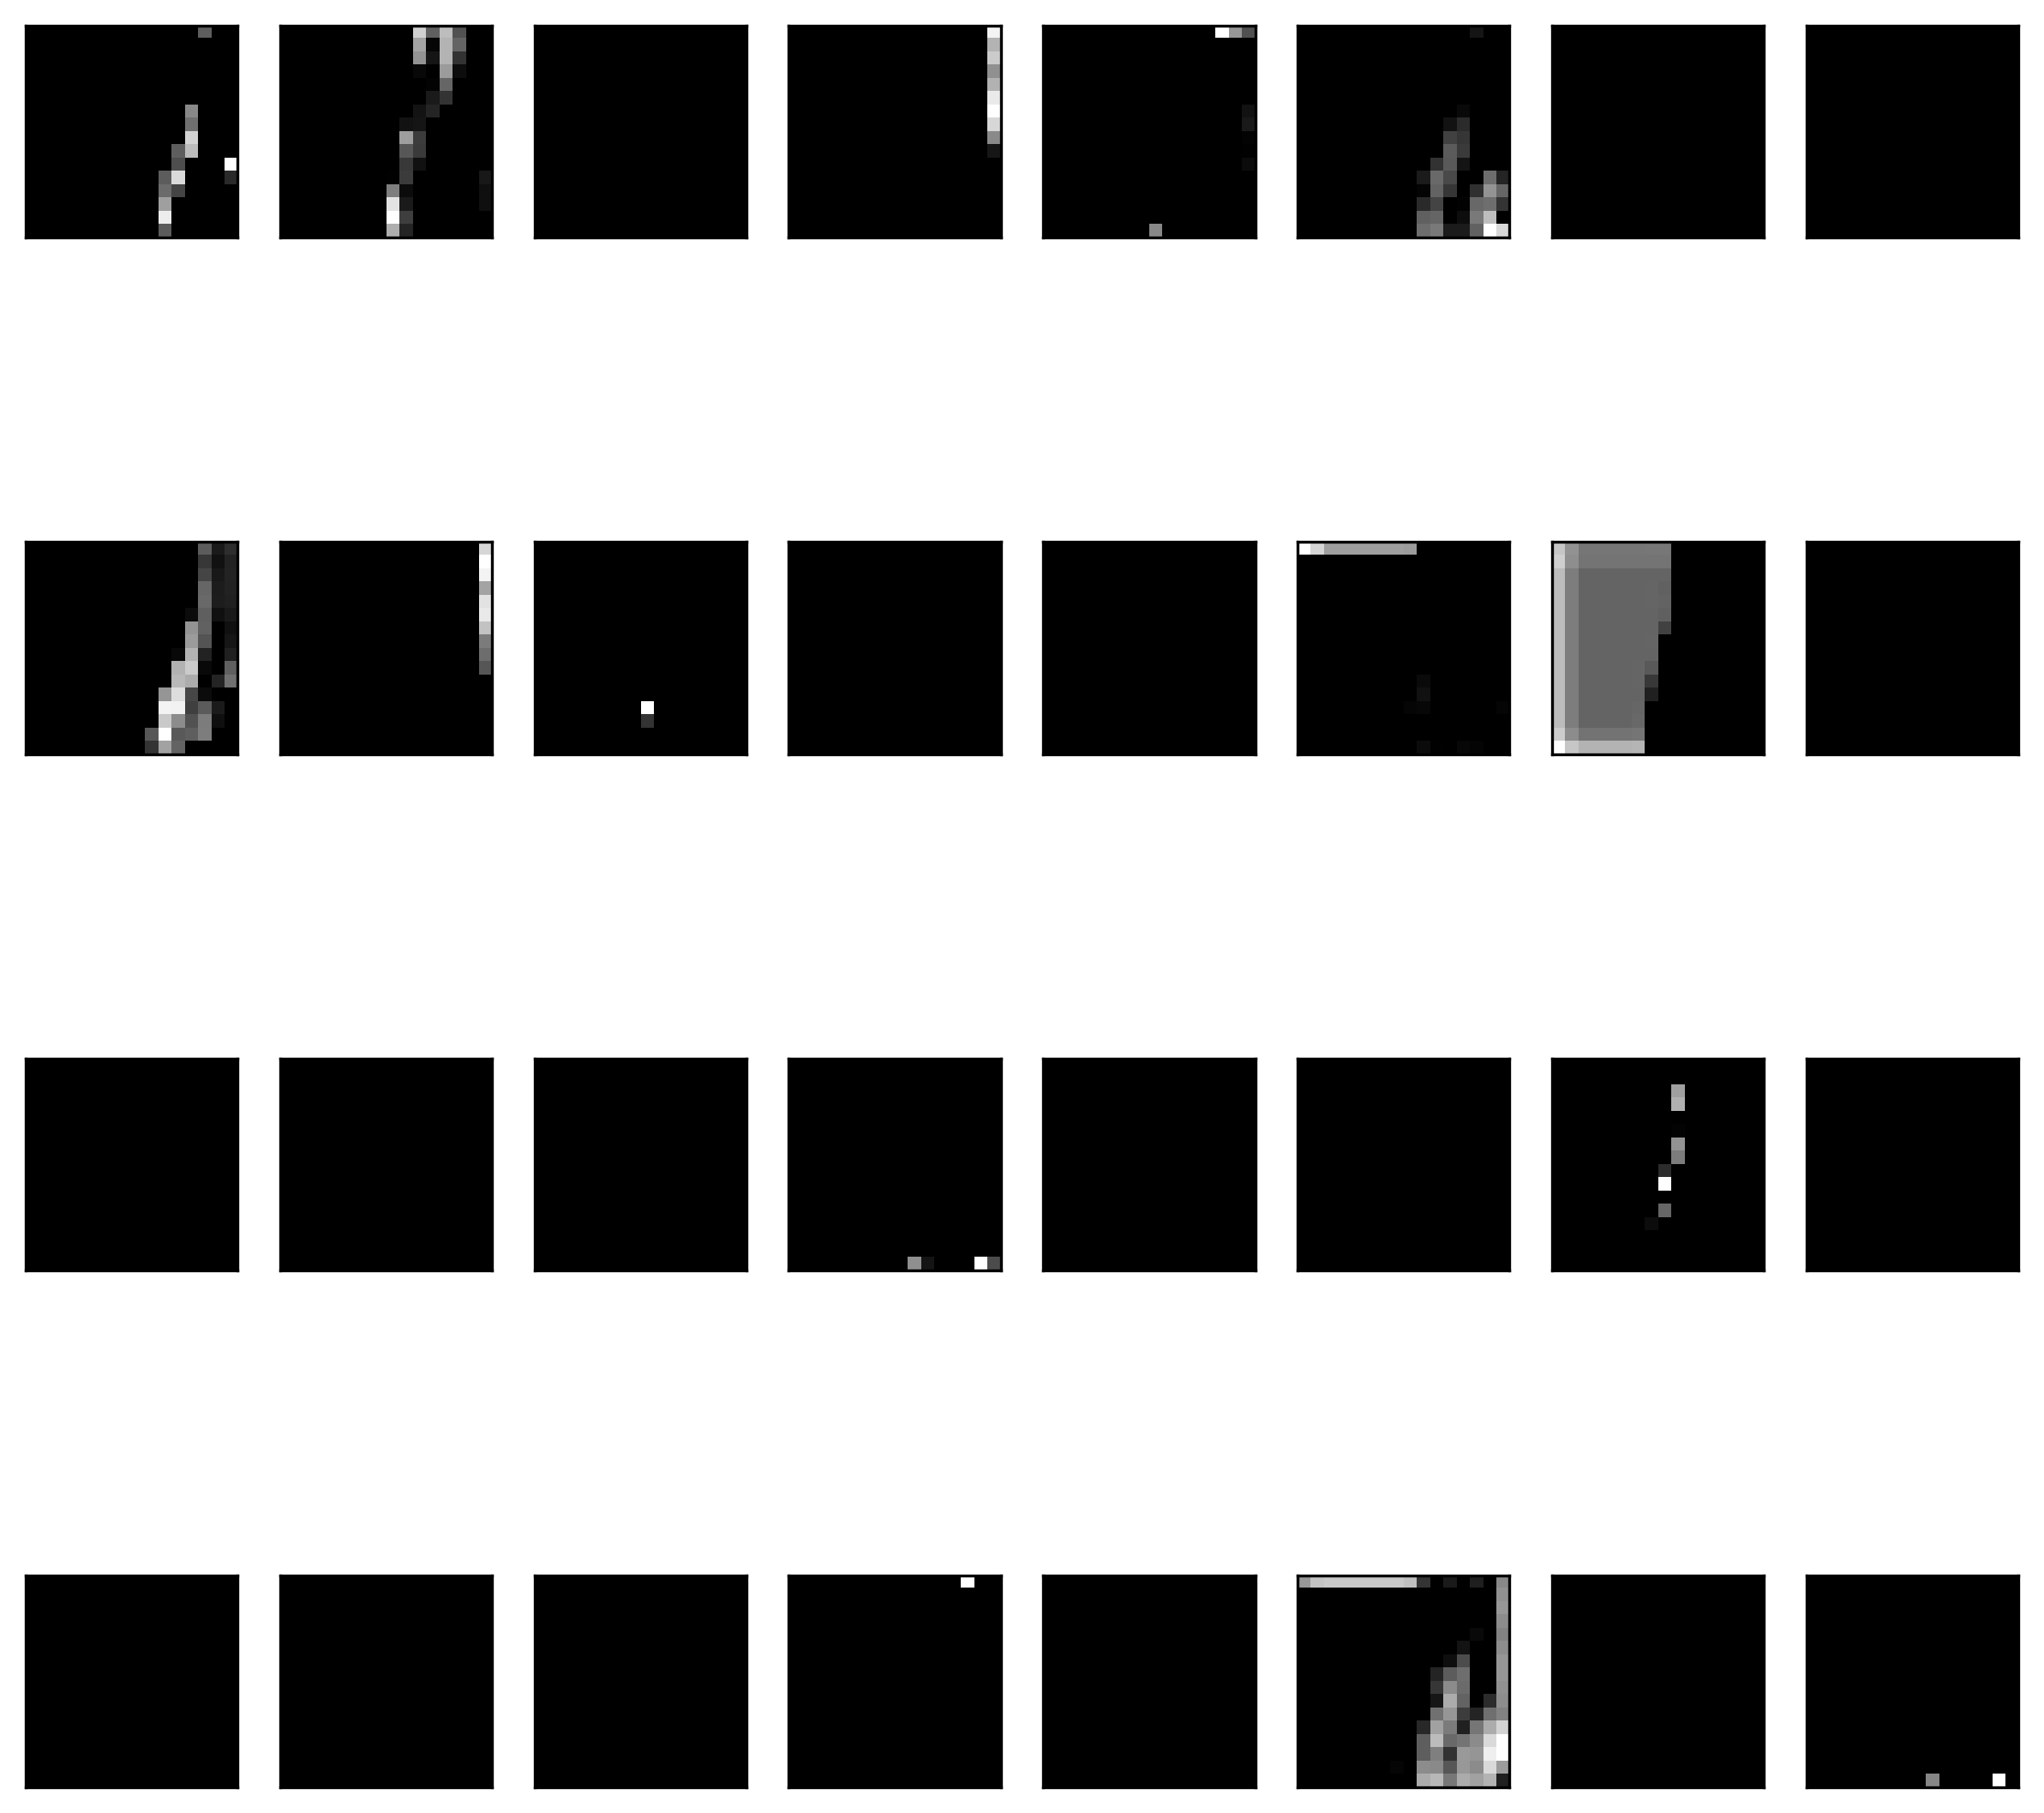

In [19]:
get_filters('input_1', 'max_pooling2d')
get_filters('input_1', 'max_pooling2d_1')
get_filters('input_1', 'max_pooling2d_2')